In [1]:
%pylab inline 
import yt 
import plot_is

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /project/projectdirs/astro250/doris/ramses/trunk/ramses/bin/

/global/project/projectdirs/astro250/doris/ramses/trunk/ramses/bin


In [3]:
from matplotlib.legend_handler import HandlerLine2D
from scipy import integrate
from mpl_toolkits.axes_grid1 import AxesGrid
from yt.mods import *
rho_c = 0.02806
scale_d = 3.92e-18
def compareplot1Dprofile(timestep):
    pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
    sp = pf.sphere(pf.domain_center, (0.32,"pc"))
    rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
    plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
    xi_max = 6.451
    def solvr(Y, t):
        return [Y[1], exp(-Y[0])-2/t*Y[1]]
    xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
    asol = integrate.odeint(solvr, [0, 0], xi)
    rho = np.exp(-asol[:,0]) #rho/rho_c
    r = xi/1.05e-17 #[cm]
#     plt.plot(r,asol[:,0],label ='psi')#$\psi$' )
    #1cm = 3.24077929e-19 Parsecs
    plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
    plt.xlabel("Physical radius [pc]",fontsize=15)
    plt.ylabel("Density[g/cm^3]",fontsize=15)
    plt.legend(loc='upper right',prop={'size':12},numpoints=1)

In [7]:
cd ../../../../fc_is_data/fc_run3/

/global/project/projectdirs/astro250/doris/fc_is_data/fc_run3



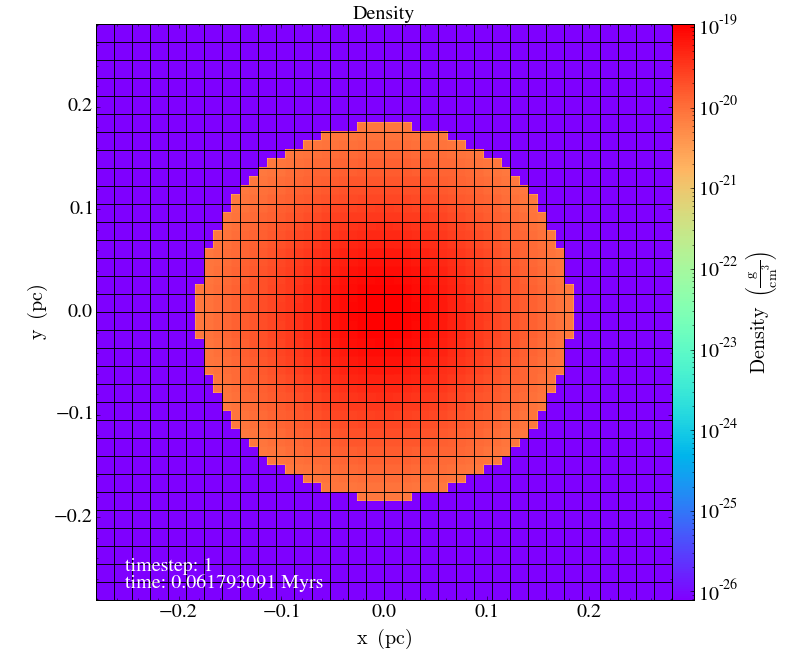


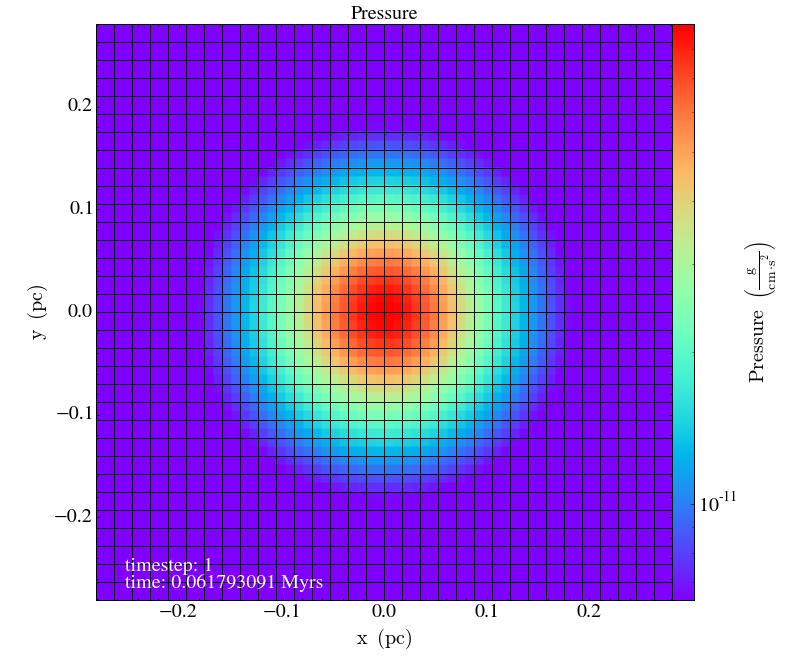


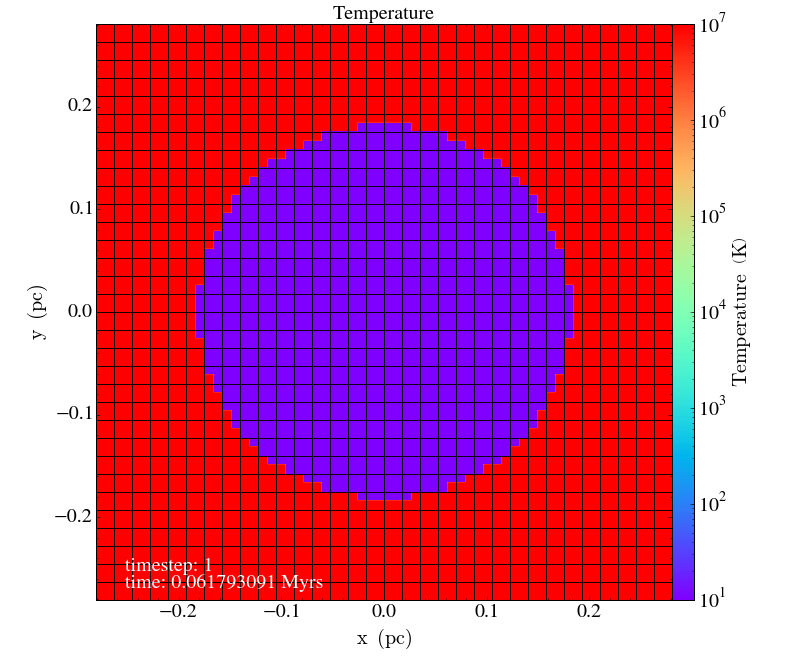

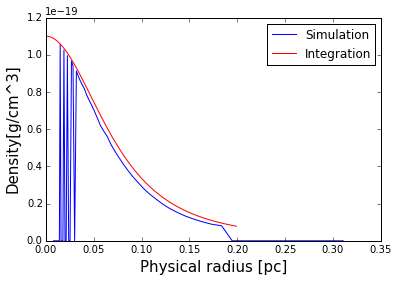

In [8]:
plot_is.plot_time_slice("density",1,title="Density")
plot_is.plot_time_slice("pressure",1,title="Pressure")
plot_is.plot_time_slice("temperature",1,title="Temperature")
compareplot1Dprofile(1)

### Using a fudge_factor to see if stretching coincide with density solution

Changing n_bins jsut changed how often x axis is sampled but didn't really affect the y values greatly'

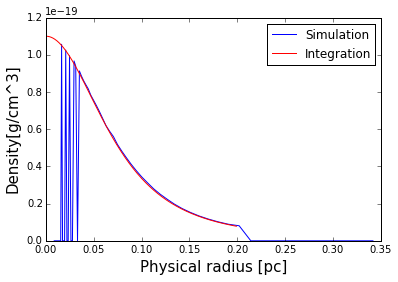

In [48]:
fudge_factor= 1.1
from matplotlib.legend_handler import HandlerLine2D
from scipy import integrate
from mpl_toolkits.axes_grid1 import AxesGrid
from yt.mods import *
rho_c = 0.02806
scale_d = 3.92e-18
def compareplot1Dprofile(timestep):
    plt.figure()
    pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
    sp = pf.sphere(pf.domain_center, (0.32,"pc"))
    rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
    plt.plot(rp.x.value*3.24077929e-19*fudge_factor,rp["density"].in_units("g/cm**3").value,label="Simulation")
    xi_max = 6.451
    def solvr(Y, t):
        return [Y[1], exp(-Y[0])-2/t*Y[1]]
    xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
    asol = integrate.odeint(solvr, [0, 0], xi)
    rho = np.exp(-asol[:,0]) #rho/rho_c
    r = xi/1.05e-17 #[cm]
#     plt.plot(r,asol[:,0],label ='psi')#$\psi$' )
    #1cm = 3.24077929e-19 Parsecs
    plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
    plt.xlabel("Physical radius [pc]",fontsize=15)
    plt.ylabel("Density[g/cm^3]",fontsize=15)
    plt.legend(loc='upper right',prop={'size':12},numpoints=1)
compareplot1Dprofile(1)

When I inserted a fudge factor of 1.1 that made the density profile exactly line up with the theoretical values that tells me that there must be a missing factor when I did the radius conversion from grid --> physical --> dimensionless units 

I suspect this is due to the boxlen/32 becaue boxlen is an integer and is as of now ~35 so this gives ~1 

In [49]:
cd /project/projectdirs/astro250/doris/ramses/trunk/ramses/bin/

/global/project/projectdirs/astro250/doris/ramses/trunk/ramses/bin


Without the factor of boxlen/32

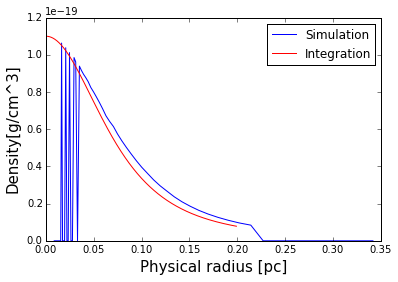

In [55]:
compareplot1Dprofile(1)

I added back the factor of boxlen/32 inside the condinit and reran the results: 

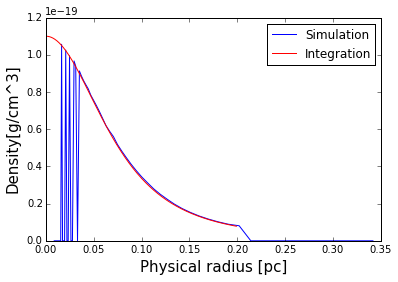

In [61]:
compareplot1Dprofile(1)


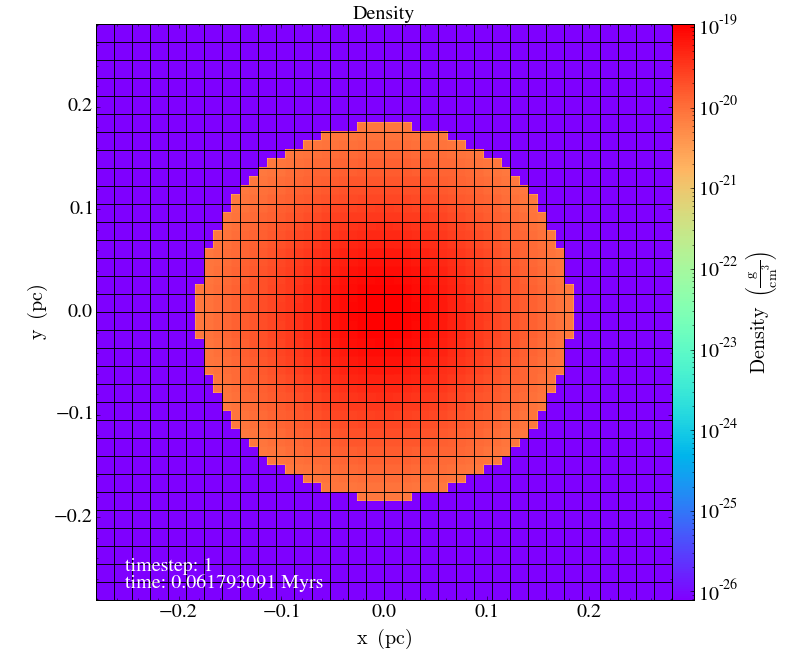


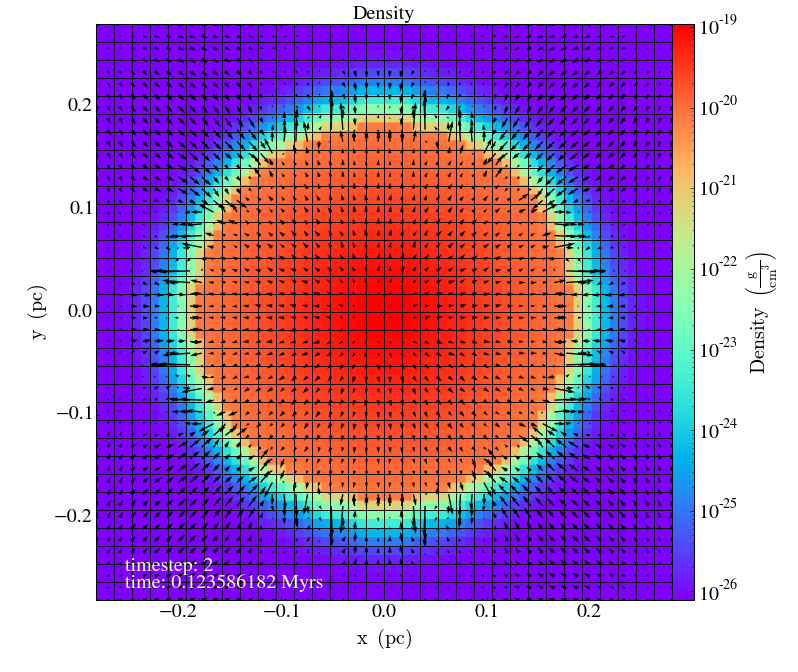


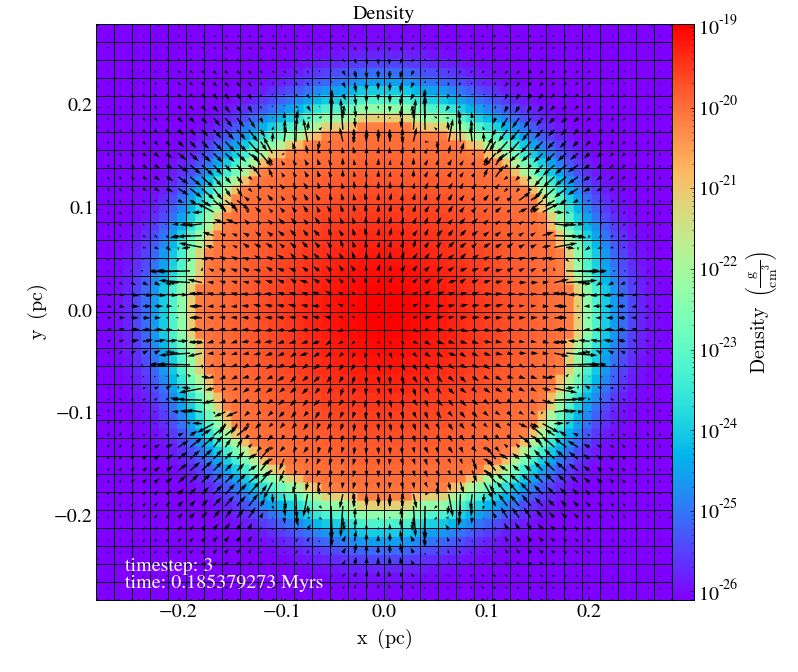


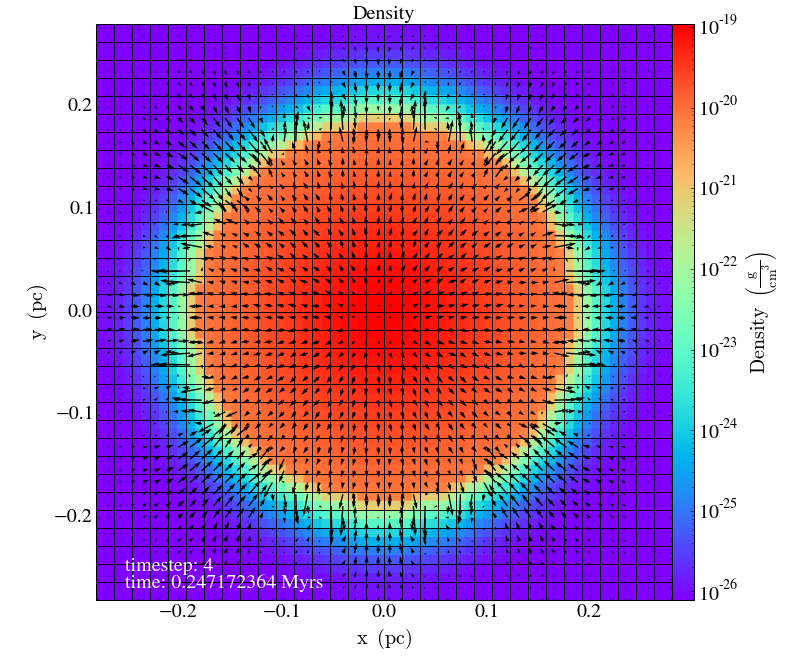


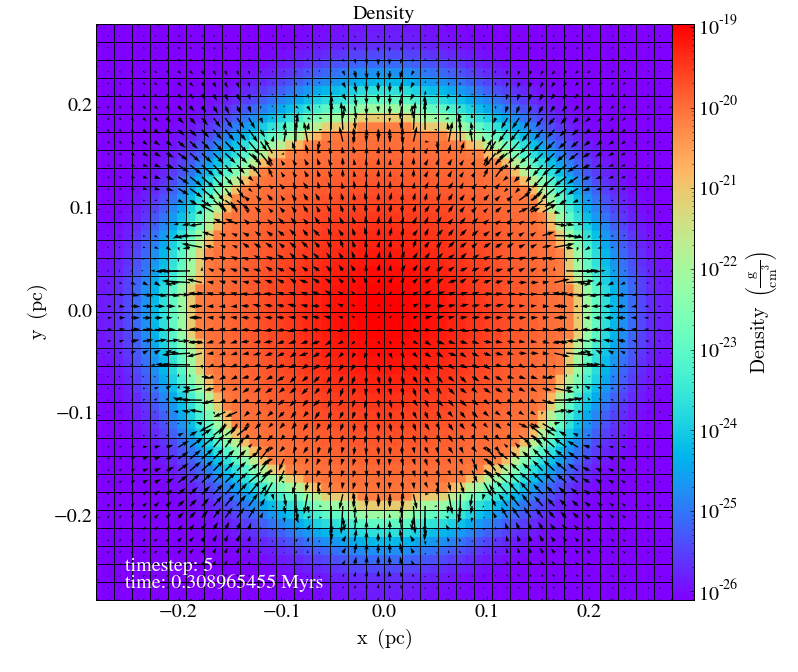


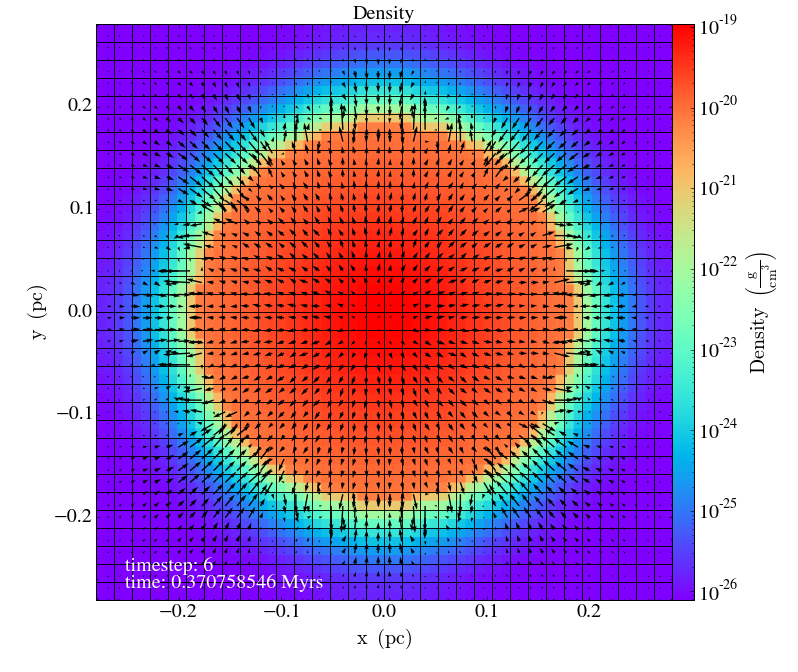

In [ ]:
for i in np.arange(1,10):
    plot_is.plot_time_slice("density",i,title="Density")